In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import mplfinance as mpf
import numpy as np
import requests
import ta

In [4]:


# Generate a list of month strings from January 2000 to December 2020.
# Adjust the start and end dates as needed.
# months = pd.date_range(start="2000-01-01", end="2020-12-01", freq='MS').strftime("%Y-%m").tolist()

# # List to store DataFrames for each month
# data_frames = []

# # Loop over each month and retrieve the data
# for month in months:
#     url = f'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=AAPL&interval=5min&month={month}&outputsize=full&apikey=S1MBYI1BQ36DNR0Y'
#     r = requests.get(url)
#     json_data = r.json()
    
#     # Check if the expected time series key exists in the response
#     ts_key = "Time Series (5min)"
#     if ts_key not in json_data:
#         print(f"Data not available for month: {month}")
#         continue
    
#     # Convert the JSON time series data to a DataFrame
#     ts_data = json_data[ts_key]
#     df = pd.DataFrame.from_dict(ts_data, orient='index')
    
#     # Rename columns for easier handling
#     df = df.rename(columns={
#         "1. open": "open",
#         "2. high": "high",
#         "3. low": "low",
#         "4. close": "close",
#         "5. volume": "volume"
#     })
    
#     # Convert all columns to numeric
#     df[['open', 'high', 'low', 'close', 'volume']] = df[['open', 'high', 'low', 'close', 'volume']].apply(pd.to_numeric)
    
#     # Convert the index to datetime
#     df.index = pd.to_datetime(df.index)
    
#     # Append the monthly DataFrame to our list
#     data_frames.append(df)

# # Concatenate all the DataFrames into one
# full_df = pd.concat(data_frames)

# # Sort the final DataFrame by its datetime index
# full_df = full_df.sort_index()

# # Display the resulting DataFrame
# full_df

In [6]:
# url = 'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=AAPL&interval=5min&month=2009-01&outputsize=full&apikey=S1MBYI1BQ36DNR0Y'
# r = requests.get(url)
# data = r.json()
# # ts_key = "Time Series (5min)"
# # time_series = data[ts_key]

# # # Convert the dictionary to a DataFrame and transpose it
# # df = pd.DataFrame.from_dict(time_series,orient='index')

# # # Rename the columns for clarity
# # df = df.rename(columns={
# #     "1. open": "Open",
# #     "2. high": "High",
# #     "3. low": "Low",
# #     "4. close": "Close",
# #     "5. volume": "Volume"
# # })

# # # Convert columns to numeric types
# # df[['open', 'high', 'low', 'close', 'volume']] = df[['open', 'high', 'low', 'close', 'volume']].apply(pd.to_numeric)
# print(data)
# # Convert the index to datetime
# # print(df)



In [8]:
TICKER = 'MSFT'
START_DATE = "2025-01-20"    # Start date for historical data
END_DATE = "2025-03-15"      # End date for historical data
INTERVAL_5M = "5m" 

In [10]:
df= yf.download(tickers = TICKER, start = START_DATE , end = END_DATE,interval = INTERVAL_5M)
df.dropna(inplace=True)  
df.sort_index(inplace=True) 
df.index=df.index.tz_convert('US/Eastern')
df
df_1h = yf.download(tickers = TICKER, start = START_DATE , end = END_DATE,interval = '1h')
df_1h.dropna(inplace=True)  
df_1h.sort_index(inplace=True) 
df_1h.index=df_1h.index.tz_convert('US/Eastern')
df_1h

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT
Datetime,,,,,
2025-01-21 09:30:00-05:00,428.470001,430.790009,425.595001,430.040009,4607395
2025-01-21 10:30:00-05:00,428.010010,428.939911,427.010010,428.420013,1321631
2025-01-21 11:30:00-05:00,428.559998,428.950012,427.709991,428.003998,1260019
2025-01-21 12:30:00-05:00,429.359985,430.899902,428.549988,428.559998,1471297
2025-01-21 13:30:00-05:00,429.260010,429.519989,427.420013,429.359985,1975165
...,...,...,...,...,...
2025-03-14 11:30:00-04:00,386.184998,387.399994,385.070007,385.279999,1850065
2025-03-14 12:30:00-04:00,387.690002,388.299988,385.903503,386.095001,1332648


In [11]:
df['EMA_5m'] = df['Close'].ewm(span = 21, adjust = False).mean()
df['EMA_1h']=df_1h['Close'].ewm(span = 21 , adjust=False).mean()
df['EMA_1h'] = df['EMA_1h'].ffill()
df

Price,Close,High,Low,Open,Volume,EMA_5m,EMA_1h
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT,,
Datetime,,,,,,,
2025-01-21 09:30:00-05:00,429.179993,430.790009,428.570007,430.040009,2070534,429.179993,428.470001
2025-01-21 09:35:00-05:00,427.769989,430.040009,427.750000,429.190002,230448,429.051811,428.470001
2025-01-21 09:40:00-05:00,426.359985,427.820007,426.045013,427.820007,396190,428.807099,428.470001
2025-01-21 09:45:00-05:00,427.111206,427.489990,426.100006,426.369995,316215,428.652927,428.470001
2025-01-21 09:50:00-05:00,425.910004,427.929993,425.595001,427.450012,328695,428.403570,428.470001
...,...,...,...,...,...,...,...
2025-03-14 15:35:00-04:00,388.033691,388.440002,387.970001,388.228394,172073,387.936312,384.103063
2025-03-14 15:40:00-04:00,388.410004,388.475006,387.959991,388.035004,183960,387.979375,384.103063


In [12]:
df.columns = df.columns.droplevel(1)
df = df.reset_index()
df = df[['Datetime', 'Open', 'Close', 'High', 'Low', 'Volume', 'EMA_5m','EMA_1h']]
df
df_1h.columns = df_1h.columns.droplevel(1)
df_1h = df_1h.reset_index()
df_1h = df_1h[['Datetime', 'Open', 'Close', 'High', 'Low', 'Volume']]
df_1h.index

RangeIndex(start=0, stop=266, step=1)

In [13]:
df = df.set_index('Datetime')
df.index
df_1h = df_1h.set_index('Datetime')
df_1h.index

DatetimeIndex(['2025-01-21 09:30:00-05:00', '2025-01-21 10:30:00-05:00',
               '2025-01-21 11:30:00-05:00', '2025-01-21 12:30:00-05:00',
               '2025-01-21 13:30:00-05:00', '2025-01-21 14:30:00-05:00',
               '2025-01-21 15:30:00-05:00', '2025-01-22 09:30:00-05:00',
               '2025-01-22 10:30:00-05:00', '2025-01-22 11:30:00-05:00',
               ...
               '2025-03-13 13:30:00-04:00', '2025-03-13 14:30:00-04:00',
               '2025-03-13 15:30:00-04:00', '2025-03-14 09:30:00-04:00',
               '2025-03-14 10:30:00-04:00', '2025-03-14 11:30:00-04:00',
               '2025-03-14 12:30:00-04:00', '2025-03-14 13:30:00-04:00',
               '2025-03-14 14:30:00-04:00', '2025-03-14 15:30:00-04:00'],
              dtype='datetime64[ns, US/Eastern]', name='Datetime', length=266, freq=None)

In [112]:
# Assume 'df' is your OHLCV DataFrame with columns: 'High', 'Low', 'Close'
# Ensure you have a DataFrame where each column is a Pandas Series:
high = df['High']   # This is already a Series (1D)
low = df['Low']
close = df['Close']

# Calculate ADX with a 14-period window using the ta library
df['ADX'] = ta.trend.adx(high=high, low=low, close=close, window=9, fillna=False)

df

Price,Open,Close,High,Low,Volume,EMA_5m,EMA_1h,ADX,signal,signal_momentum_5m
Datetime,,,,,,,,,,
2025-01-21 09:30:00-05:00,430.040009,429.179993,430.790009,428.570007,2070534,429.179993,428.470001,0.000000,0,0
2025-01-21 09:35:00-05:00,429.190002,427.769989,430.040009,427.750000,230448,429.051811,428.470001,0.000000,0,1
2025-01-21 09:40:00-05:00,427.820007,426.359985,427.820007,426.045013,396190,428.807099,428.470001,0.000000,0,1
2025-01-21 09:45:00-05:00,426.369995,427.111206,427.489990,426.100006,316215,428.652927,428.470001,0.000000,0,1
2025-01-21 09:50:00-05:00,427.450012,425.910004,427.929993,425.595001,328695,428.403570,428.470001,0.000000,0,0
...,...,...,...,...,...,...,...,...,...,...
2025-03-14 15:35:00-04:00,388.228394,388.033691,388.440002,387.970001,172073,387.936312,384.103063,27.109141,0,0
2025-03-14 15:40:00-04:00,388.035004,388.410004,388.475006,387.959991,183960,387.979375,384.103063,27.743896,0,0
2025-03-14 15:45:00-04:00,388.369995,388.699585,388.910004,388.290009,263267,388.044849,384.103063,30.874299,0,0


In [114]:
def signal_generator(df):
    df['signal'] = 0
    for i in range(1, len(df)):
        current_high = df['High'].iloc[i]
        prev_high = df['High'].iloc[i-1]
        prev_Range = df['High'].iloc[i-1] - df['Low'].iloc[i-1]
        hightoclose = df['High'].iloc[i] - df['Close'].iloc[i]
        closetoprevlow = df['Close'].iloc[i] - df['Low'].iloc[i-1]
        if (df['Close'].iloc[i-1] > df['Open'].iloc[i-1]).all():
            if ((current_high > prev_high) & (df['Close'].iloc[i] <df['Open'].iloc[i]) &(closetoprevlow >= hightoclose)& (df['Low'].iloc[i] > (df['Low'].iloc[i-1]+(prev_Range * 0.2))) & (df['Low'].iloc[i] > df['EMA_5m'].iloc[i])).all():
                df.at[df.index[i], 'signal']=1
    return df           
df = signal_generator(df)
filtered_df = df[df['signal']==1]
filtered_df

Price,Open,Close,High,Low,Volume,EMA_5m,EMA_1h,ADX,signal,signal_momentum_5m
Datetime,,,,,,,,,,
2025-01-21 15:15:00-05:00,428.845001,428.804993,428.970001,428.579987,122881,428.419499,428.632468,24.411946,1,0
2025-01-22 09:30:00-05:00,437.470001,437.459991,438.739990,436.799988,3129373,429.370433,429.643487,31.608226,1,0
2025-01-22 12:40:00-05:00,445.190002,445.100006,445.410004,445.010010,86791,443.502896,433.193678,62.427776,1,0
2025-01-27 13:25:00-05:00,429.649994,429.415009,429.899994,429.329987,141954,428.449817,437.809632,28.758171,1,0
2025-01-27 13:35:00-05:00,430.565002,430.355011,431.209991,430.329987,164073,428.797826,437.500575,36.487465,1,0
2025-01-27 14:20:00-05:00,434.320007,434.070007,434.579987,433.920013,163338,430.980979,437.500575,66.157479,1,0
2025-01-28 15:55:00-05:00,447.434998,447.019989,447.920013,447.019989,1195807,446.922283,441.082864,31.030353,1,0
2025-01-29 14:45:00-05:00,444.579987,444.459991,445.000000,444.020111,188908,443.037617,441.967345,31.154627,1,0
2025-01-31 09:55:00-05:00,419.442413,418.970001,419.769989,418.375092,337012,416.727056,427.905790,43.764777,1,0


In [126]:
def signal_generator_momentum_5m(df):
    df['signal_momentum_5m'] = 0
    for i in range(1, len(df)):
        current_high = df['High'].iloc[i]
        prev_high = df['High'].iloc[i-1]
        prev_Range = df['High'].iloc[i-1] - df['Low'].iloc[i-1]
        hightoclose = df['High'].iloc[i] - df['Close'].iloc[i]
        closetoprevlow = df['Close'].iloc[i] - df['Low'].iloc[i-1]
        
        if (  (df['Close'].iloc[i] <df['Open'].iloc[i])  & (df['High'].iloc[i] >= df['EMA_5m'].iloc[i])&(df['Close'].iloc[i] 
                < df['EMA_5m'].iloc[i]) &(df['Low'].iloc[i] > df['EMA_1h'].iloc[i])& (df['Low'].iloc[i-4:i-1] < df['EMA_5m'].iloc[i-4:i-1])
           &(df['ADX'].iloc[i] >= 10)).all():
                df.at[df.index[i], 'signal_momentum_5m']=1
    return df   
df = signal_generator_momentum_5m(df)
df

Price,Open,Close,High,Low,Volume,EMA_5m,EMA_1h,ADX,signal,signal_momentum_5m
Datetime,,,,,,,,,,
2025-01-21 09:30:00-05:00,430.040009,429.179993,430.790009,428.570007,2070534,429.179993,428.470001,0.000000,0,0
2025-01-21 09:35:00-05:00,429.190002,427.769989,430.040009,427.750000,230448,429.051811,428.470001,0.000000,0,1
2025-01-21 09:40:00-05:00,427.820007,426.359985,427.820007,426.045013,396190,428.807099,428.470001,0.000000,0,1
2025-01-21 09:45:00-05:00,426.369995,427.111206,427.489990,426.100006,316215,428.652927,428.470001,0.000000,0,1
2025-01-21 09:50:00-05:00,427.450012,425.910004,427.929993,425.595001,328695,428.403570,428.470001,0.000000,0,0
...,...,...,...,...,...,...,...,...,...,...
2025-03-14 15:35:00-04:00,388.228394,388.033691,388.440002,387.970001,172073,387.936312,384.103063,27.109141,0,0
2025-03-14 15:40:00-04:00,388.035004,388.410004,388.475006,387.959991,183960,387.979375,384.103063,27.743896,0,0
2025-03-14 15:45:00-04:00,388.369995,388.699585,388.910004,388.290009,263267,388.044849,384.103063,30.874299,0,0


Datetime
2025-02-05 13:00:00-05:00   NaN
2025-02-05 13:05:00-05:00   NaN
2025-02-05 13:10:00-05:00   NaN
2025-02-05 13:15:00-05:00   NaN
2025-02-05 13:20:00-05:00   NaN
                             ..
2025-02-11 11:35:00-05:00   NaN
2025-02-11 11:40:00-05:00   NaN
2025-02-11 11:45:00-05:00   NaN
2025-02-11 11:50:00-05:00   NaN
2025-02-11 11:55:00-05:00   NaN
Length: 300, dtype: float64


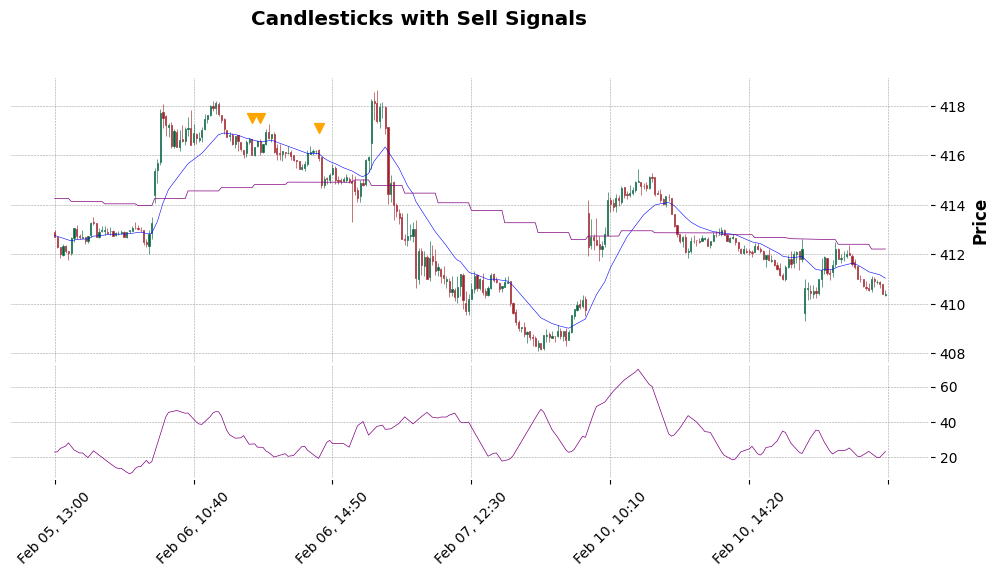

In [127]:
df_1 = df[900:1200]
signal_prices_2 = pd.Series(index = df_1.index)
# signal_prices_1 = df_1['High'] * 1.0020
# signal_prices_1[df_1['signal'] != 1] = np.nan
signal_prices_2[df_1['signal_momentum_5m'] ==1] = df_1['High'] * 1.0020
print(signal_prices_2)


# signal_prices = df['High'][df['signal'] == 1] * 1.01  # 1% above High
ap = [mpf.make_addplot(
    signal_prices_2,
    type='scatter',
    markersize=50,
    marker='v',
    color='orange',
    panel=0
), mpf.make_addplot(df_1['EMA_5m'], type ='line', color='blue', width=0.4),mpf.make_addplot(df_1['EMA_1h'],type='line', color='purple', width=0.5),
      mpf.make_addplot(df_1['ADX'],panel=1, type='line', color='purple', width=0.5)]

mpf.plot(
    df_1,
    type='candle',
    style='charles',
    addplot=ap,
    title='Candlesticks with Sell Signals',
    ylabel='Price', figratio=(20, 9),   # sets the aspect ratio
         figscale=1.0
)

In [128]:
# df_1 = df[400:700]
# signal_prices_1 = pd.Series(index = df_1.index)
# # signal_prices_1 = df_1['High'] * 1.0020
# # signal_prices_1[df_1['signal'] != 1] = np.nan
# signal_prices_1[df_1['signal'] ==1] = df_1['High'] * 1.0020
# print(signal_prices_1)


# # signal_prices = df['High'][df['signal'] == 1] * 1.01  # 1% above High
# ap = [mpf.make_addplot(
#     signal_prices_1,
#     type='scatter',
#     markersize=50,
#     marker='v',
#     color='orange',
#     panel=0
# ), mpf.make_addplot(df_1['EMA_5m'], type ='line', color='blue', width=0.4),mpf.make_addplot(df_1['EMA_1h'],type='line', color='purple', width=0.5)]

# mpf.plot(
#     df_1,
#     type='candle',
#     style='charles',
#     addplot=ap,
#     title='Candlesticks with Sell Signals',
#     ylabel='Price', figratio=(20, 9),   # sets the aspect ratio
#          figscale=1.0
# )

In [129]:
# def backtest_strategy(data):
#     """
#     Backtests the strategy with risk-reward 1:2 and breakeven adjustment.
    
#     Args:
#         data (pd.DataFrame): DataFrame with datetime index and columns 'high', 'low', 'open', 'close', 'signal'
        
#     Returns:
#         pd.DataFrame: DataFrame containing trade history with entry/exit details
#     """
#     trades = []
#     entry_signals = data[data['signal'] == 1].index
    
#     for entry_time in entry_signals:
#         entry_idx = data.index.get_loc(entry_time)
#         if entry_idx == 0:
#             continue  # Skip first index to have previous candle
        
#         # Entry price (signal candle's high)
#         entry_price = data.iloc[entry_idx]['Close']
        
#         # Initial stop loss (previous candle's low)
#         initial_stop = data.iloc[entry_idx]['High']
#         risk = entry_price - initial_stop
        
#         # Calculate targets
#         tp1 = data.iloc[entry_idx -1]['Low']
#         # tp2 = entry_price +  risk
        
#         # Initialize trade tracking
#         current_stop = initial_stop
#         exit_price = None
#         exit_time = None
#         exit_reason = None
#         breakeven_triggered = False
        
#         # Simulate trade progression
#         for j in range(entry_idx+1, len(data)):
#             current_candle = data.iloc[j]
#             if (current_candle['EMA_5m'] >= current_candle['EMA_1h']).all():
#                 tp2 = current_candle['EMA_5m']
#             else:
#                 tp2 = current_candle['EMA_1h']
            
            
#             # Check for stop loss hit
#             if (current_candle['High'] >= current_stop).all():
#                 exit_price = current_stop
#                 exit_time = current_candle.name
#                 exit_reason = 'stop_loss'
#                 break
                
#             # Check for TP1 hit (only before breakeven)
#             if not breakeven_triggered and (current_candle['Low'] <= tp1).all():
#                 current_stop = entry_price
#                 breakeven_triggered = True
                
#             # Check for TP2 hit
#             if (current_candle['Low'] <= tp2).all():
#                 exit_price = tp2
#                 exit_time = current_candle.name
#                 exit_reason = 'tp2'
#                 break
                
#             # Check for breakeven stop loss
#             if breakeven_triggered and (current_candle['High'] >= entry_price).all():
#                 exit_price = entry_price
#                 exit_time = current_candle.name
#                 exit_reason = 'breakeven'
#                 break
                
#         # If trade is still open at end of data
#         if exit_price is None:
#             exit_price = data.iloc[-1]['Close']
#             exit_time = data.index[-1]
#             exit_reason = 'open_at_end'
            
#         # Record trade
#         trades.append({
#             'entry_time': entry_time,
#             'entry_price': entry_price,
#             'exit_time': exit_time,
#             'exit_price': exit_price,
#             'exit_reason': exit_reason,
#             'risk': risk,
#             'pnl': -(exit_price - entry_price),
#             'rrr': (exit_price - entry_price) / risk 
#         })
    
#     return pd.DataFrame(trades)
  
# trade_history = backtest_strategy(df)

    
        
# def calculate_metrics(trade_df):
    
#     """Calculates performance metrics from trade dataframe"""
#     winning_trades = 0 
#     lose_t = 0
#     for m in range(0, len(trade_df['pnl'])):
#         call = trade_df['pnl'].iloc[m]
#         if (call > 0).all():
#             winning_trades = winning_trades + 1
#         if (call < 0).all():
#             lose_t = lose_t + 1
#     metrics = {
#         'total_trades': len(trade_df),
#         'winning_trades': winning_trades,
#         'losing_trades': lose_t,
#         'win_rate': winning_trades / len(trade_df) if len(trade_df) > 0 else 0,
#         'total_pnl': trade_df['pnl'].sum(),
#         'total rrr': trade_df['rrr'].sum()
        
        
       
#     }
#     return pd.DataFrame([metrics])
# performance_metrics = calculate_metrics(trade_history)
# print(performance_metrics)
# trade_history

In [130]:
def backtest_strategy_1(data):
    """
    Backtests the strategy with risk-reward 1:2 and breakeven adjustment.
    
    Args:
        data (pd.DataFrame): DataFrame with datetime index and columns 'high', 'low', 'open', 'close', 'signal'
        
    Returns:
        pd.DataFrame: DataFrame containing trade history with entry/exit details
    """
    trades = []
    entry_signals = data[data['signal_momentum_5m'] == 1].index
    
    for entry_time in entry_signals:
        entry_idx = data.index.get_loc(entry_time)
        if entry_idx == 0:
            continue  # Skip first index to have previous candle
        
        # Entry price (signal candle's high)
        entry_price = data.iloc[entry_idx]['Close']
        
        # Initial stop loss (previous candle's low)
        initial_stop = data.iloc[entry_idx]['High']
        risk = entry_price - initial_stop          #negative quantity 
        
        # Calculate targets
        # tp1 = entry_price + risk
        # tp2 = entry_price +  risk
        
        # Initialize trade tracking
        current_stop = initial_stop
        exit_price = None
        exit_time = None
        exit_reason = None
        breakeven_triggered = False
        
        # Simulate trade progression
        for j in range(entry_idx+1, len(data)):
            current_candle = data.iloc[j]
            if (current_candle['EMA_1h']<= entry_price+risk):
                tp2 = current_candle['EMA_1h']
                tp1 = entry_price+risk
            else:
                tp1 = current_candle['EMA_1h']
                tp2 = current_candle['EMA_1h']
            
            
            # Check for stop loss hit
            if (current_candle['High'] >= current_stop).all():
                exit_price = current_stop
                exit_time = current_candle.name
                exit_reason = 'stop_loss'
                break
                
            # Check for TP1 hit (only before breakeven)
            if not breakeven_triggered and (current_candle['Low'] <= tp1).all():
                current_stop = entry_price
                breakeven_triggered = True
                
            # Check for TP2 hit
            if (current_candle['Low'] <= tp2).all():
                exit_price = tp2
                exit_time = current_candle.name
                exit_reason = 'tp2'
                break
                
            # Check for breakeven stop loss
            if breakeven_triggered and (current_candle['High'] >= entry_price).all():
                exit_price = entry_price
                exit_time = current_candle.name
                exit_reason = 'breakeven'
                break
                
        # If trade is still open at end of data
        if exit_price is None:
            exit_price = data.iloc[-1]['Close']
            exit_time = data.index[-1]
            exit_reason = 'open_at_end'
            
        # Record trade
        trades.append({
            'entry_time': entry_time,
            'entry_price': entry_price,
            'exit_time': exit_time,
            'exit_price': exit_price,
            'exit_reason': exit_reason,
            'risk': risk,
            'pnl': -(exit_price - entry_price),
            'rrr': (exit_price - entry_price) / risk 
        })
    
    return pd.DataFrame(trades)
  
trade_history = backtest_strategy_1(df)

    
        
def calculate_metrics(trade_df):
    
    """Calculates performance metrics from trade dataframe"""
    winning_trades = 0 
    lose_t = 0
    for m in range(0, len(trade_df['pnl'])):
        call = trade_df['pnl'].iloc[m]
        if (call > 0).all():
            winning_trades = winning_trades + 1
        if (call < 0).all():
            lose_t = lose_t + 1
    metrics = {
        'total_trades': len(trade_df),
        'winning_trades': winning_trades,
        'losing_trades': lose_t,
        'win_rate': winning_trades / len(trade_df) if len(trade_df) > 0 else 0,
        'total_pnl': trade_df['pnl'].sum(),
        'total rrr': trade_df['rrr'].sum()
        
        
       
    }
    return pd.DataFrame([metrics])
performance_metrics = calculate_metrics(trade_history)
print(performance_metrics)
trade_history[:40]

   total_trades  winning_trades  losing_trades  win_rate  total_pnl  total rrr
0            33               9             19  0.272727   0.292196  -2.665451


,entry_time,entry_price,exit_time,exit_price,exit_reason,risk,pnl,rrr
0,2025-01-21 09:35:00-05:00,427.769989,2025-01-21 09:40:00-05:00,428.470001,tp2,-2.270020,-0.700012,-0.308373
1,2025-01-21 09:40:00-05:00,426.359985,2025-01-21 09:45:00-05:00,428.470001,tp2,-1.460022,-2.110016,-1.445195
2,2025-01-21 09:45:00-05:00,427.111206,2025-01-21 09:50:00-05:00,427.489990,stop_loss,-0.378784,-0.378784,-1.000000
3,2025-01-23 11:15:00-05:00,442.690002,2025-01-23 11:25:00-05:00,443.399994,stop_loss,-0.709991,-0.709991,-1.000000
4,2025-01-23 13:15:00-05:00,442.940002,2025-01-23 13:20:00-05:00,443.209991,stop_loss,-0.269989,-0.269989,-1.000000
5,2025-01-24 10:15:00-05:00,444.179993,2025-01-24 10:45:00-05:00,445.290009,stop_loss,-1.110016,-1.110016,-1.000000
6,2025-01-24 12:25:00-05:00,444.820007,2025-01-24 14:10:00-05:00,441.714157,tp2,-0.720001,3.105850,4.313673
7,2025-01-24 15:25:00-05:00,442.679993,2025-01-24 15:40:00-05:00,442.880005,stop_loss,-0.200012,-0.200012,-1.000000
8,2025-01-24 15:30:00-05:00,442.690002,2025-01-24 15:40:00-05:00,442.871094,stop_loss,-0.181091,-0.181091,-1.000000
9,2025-01-28 15:45:00-05:00,446.269989,2025-01-28 15:50:00-05:00,447.000000,stop_loss,-0.730011,-0.730011,-1.000000
